***UN PROBLEMA, DOS SOLUCIONES***

***Problema: Creación de muchos tipos específicos de algo en partícular y su interacción entre ellos.***

***La idea es separar las partes del proceso***

***Si con Template_method definiamos tipos de algo específico, acá estamos definiendo la creación de los distintos componentes que integran el sistema. Template_method apunta a algo más específico***

***EJEMPLOS:*** 

***Animales:*** 

***1)Factory_method: Creación de distintos animales.***

***2)Template_method: Creación de disntintas razas de perros, tipos de tigres, razas de caballos***


***Vehículos*** 

***1)Factory_method: Creación de distintos vehículos: Helicóptero, Auto, Camiones, Motos.***

***2)Template_method: Creación de diversas marcas de autos, marcas de helicópteros, tipos de camiones, etc***


***MISMO PROBLEMA QUE ABSTRACT_METHOD***

***Factory_method usa herencia en lugar de agregación***


Define una interfaz para la creación de un objeto pero delega a las subclases que deciden qué clase instanciar. 

Este patrón es en realidad el patrón template method aplicado al problema de creación de objetos, se crean clases herederas para que realicen la acción de crear. Por lo que se separan: ***las acciones del animal (clases con sus acciones), el crear el animal (clase que crea el animal y heredan de la abstracta) y la ejecución de sus acciones (clase abstracta).***

Primero instanciamos las acciones de los animales

In [6]:
class Duck
    def initialize(name) 
      @name = name 
    end
    def eat 
      puts("Duck #{@name} is eating.") 
    end
    def speak 
      puts("Duck #{@name} says Quack!") 
    end
    def sleep 
      puts("Duck #{@name} sleeps quietly.")
    end 
  end
  
  class Frog
    def initialize(name) 
      @name = name 
    end
    def eat 
      puts("Frog #{@name} is eating.") 
    end
    def speak 
      puts("Frog #{@name} says Crooooaaaak!") 
    end
    def sleep 
      puts("Frog #{@name} doesnt sleep, he coreaks all night!")
    end 
  end

 

:sleep

Luego instanciamos la clase abstracta. Esta es heredada por las clases de creación de animales y posee el método de interacción.

In [7]:
class Pond  
    def initialize(number_animals)    
        @animals = []    
        number_animals.times do |i|
            animal = new_animal("Animal#{i}")       
            @animals << animal    
        end  
    end   
    def simulate_one_day    
        @animals.each {|animal| animal.speak}    
        @animals.each {|animal| animal.eat}    
        @animals.each {|animal| animal.sleep}  
    end 
end 

:simulate_one_day

Se instancian estas subclases, las cuales mandan las instrucciones a la clase madre.

Las subclases se encargan de crear los objetos, trabajan para su clase madre.
La unica misión de estas subclases es crear el objeto, no poseen init.

In [8]:
class DuckPond < Pond 
    def new_animal(name)    
        Duck.new(name)  
    end
end 

class FrogPond < Pond
    def new_animal(name)    
        Frog.new(name)  
    end  
end 

:new_animal

Dado que la acción de crear clases está relagada en las subclases, se instancian a ellas para crear animales. Recordemos que estas son herencias de la clase madre, por lo que tienen todos sus métodos.

In [9]:
pond = FrogPond.new(3)
pond.simulate_one_day


Frog Animal0 says Crooooaaaak!
Frog Animal1 says Crooooaaaak!
Frog Animal2 says Crooooaaaak!
Frog Animal0 is eating.
Frog Animal1 is eating.
Frog Animal2 is eating.
Frog Animal0 doesnt sleep, he coreaks all night!
Frog Animal1 doesnt sleep, he coreaks all night!
Frog Animal2 doesnt sleep, he coreaks all night!


[#<Frog:0x00007f8df628b988 @name="Animal0">, #<Frog:0x00007f8df628b898 @name="Animal1">, #<Frog:0x00007f8df628b7a8 @name="Animal2">]

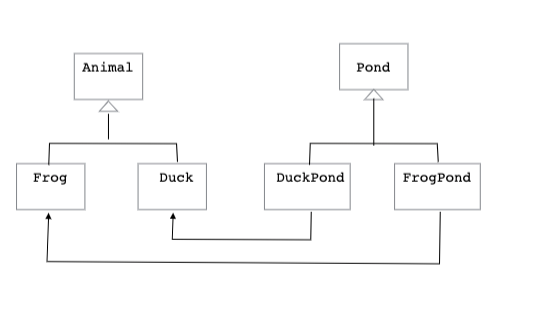

***De esta forma se puede separar la parte de creación con la de interacción, de manera de que se pueden "enchufar" las distintas interacciones con los distintos animales***